In [3]:
import torch
from torch import optim

In [4]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [5]:
weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [6]:
optimizer = optim.SGD([weight, bias], lr=learning_rate)

In [7]:
for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


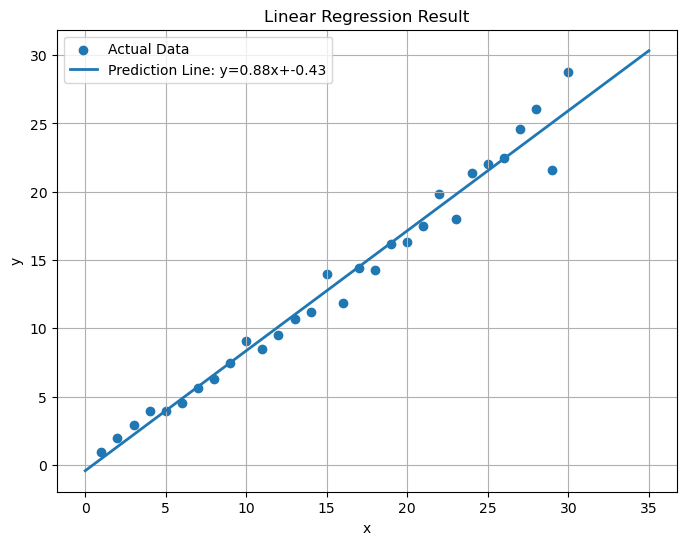

In [8]:
import matplotlib.pyplot as plt

# 학습된 weight, bias 출력
trained_weight = weight.item()
trained_bias = bias.item()

# 예측값 생성
x_test = torch.linspace(0, 35, 100).unsqueeze(1)  # 0~35까지 100개의 점 생성
y_pred = trained_weight * x_test + trained_bias

# 실제 데이터와 예측 선 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Actual Data')  # 실제 데이터
plt.plot(x_test.numpy(), y_pred.detach().numpy(), label=f'Prediction Line: y={trained_weight:.2f}x+{trained_bias:.2f}', linewidth=2)  # 예측 선
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

